<a href="https://colab.research.google.com/github/venkatesh-eranti/DBSCAN-vs-K-Means-vs-Hierarchical-Clustering/blob/main/K_Means_vs_Hierarchical_vs_DBSCAN_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# general librariers
import pandas as pd
import numpy as np
import math
# visualisations
import matplotlib.pyplot as plt
import seaborn as sns
# model building
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.neighbors import NearestNeighbors
# evaluation
from sklearn.metrics import silhouette_score

Here, I am creating a dataset with only two features so that we can visualize it easily. <br>
For creating the dataset I have created a function PointsInCircum which takes the radius and number of data points as arguments and returns an array of data points which when plotted forms a `circle`. We do this with the help of sin and cosine curves.

In [4]:
np.random.seed(42)
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

One circle won’t be sufficient to see the clustering ability of DBSCAN.<br> Therefore, I have created three concentric circles of different radii.<br> Also, I will add noise to this data so that we can see how different types of clustering algorithms deals with noise.

In [5]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

In [6]:
df.head()

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181


Text(0.5, 0, 'feature 2')

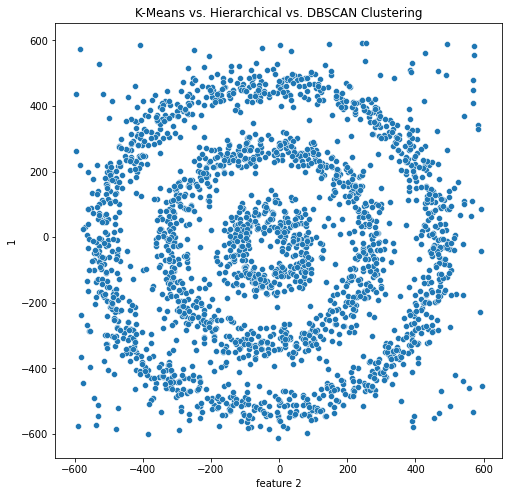

In [10]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df[0],y=df[1])
plt.title('K-Means vs. Hierarchical vs. DBSCAN Clustering')
plt.xlabel('feature 1')
plt.xlabel('feature 2')

# K-means

In [13]:
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(df[[0,1]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [15]:
df['kmeans_labels']=kmeans.labels_

Text(0, 0.5, 'feature 2')

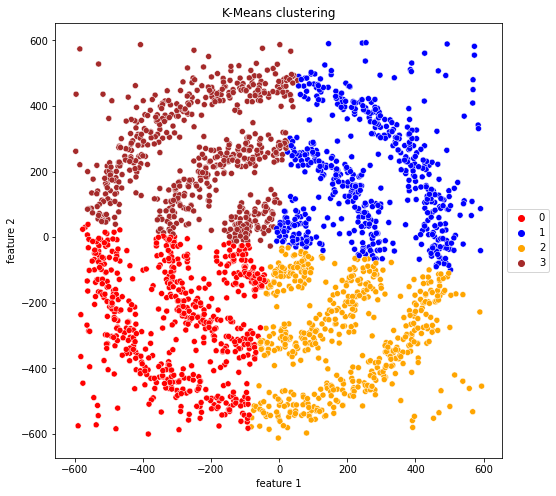

In [66]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df[0],y=df[1],hue=df['kmeans_labels'],palette=['red','blue','orange','brown'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('K-Means clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

# Hierarchical Clustering

In [19]:
hier = AgglomerativeClustering(n_clusters=4,affinity='euclidean')
hier.fit(df[[0,1]])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [21]:
df['hier_labels']=hier.labels_

Text(0, 0.5, 'feature 2')

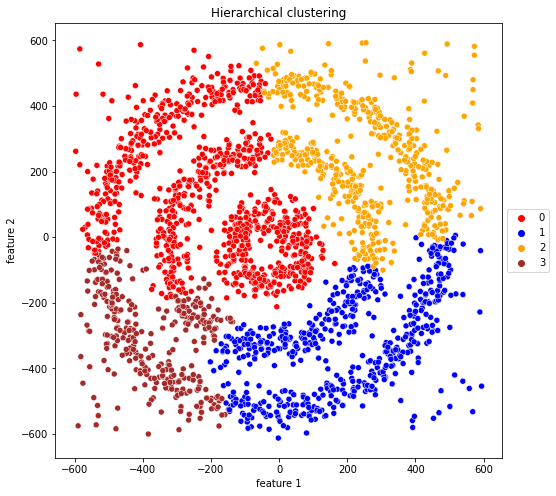

In [65]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df[0],y=df[1],hue=df['hier_labels'],palette=['red','blue','orange','brown'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Hierarchical clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

# DBSCAN

to build `DBSCAN` we need epsilon and minimum number of points <br>
For epsilon, I am using the K-distance graph. For plotting a K-distance Graph <br> we need the distance between a point and its nearest data point for all data points in the dataset. We obtain this using NearestNeighbors

In [29]:
near=NearestNeighbors(n_neighbors=2)
nbrs=near.fit(df[[0,1]])
dist,i=nbrs.kneighbors(df[[0,1]])

In [30]:
dist

array([[ 0.        ,  6.91861074],
       [ 0.        , 10.80836526],
       [ 0.        ,  7.56030267],
       ...,
       [ 0.        , 25.77071121],
       [ 0.        , 23.34523506],
       [ 0.        , 37.73592453]])

## Plotting K-distance Graph

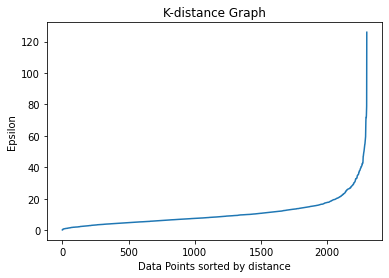

In [32]:
dist = np.sort(dist, axis=0)
dist = dist[:,1]
plt.plot(dist)
plt.title('K-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

The optimum value of `epsilon` is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case. 

In [34]:
dbscan=DBSCAN(eps=30,min_samples=5)
dbscan.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=30, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [36]:
df['dbscan_labels']=dbscan.labels_

In [37]:
df['dbscan_labels'].value_counts()

 0    1044
 1     738
 2     319
-1     199
Name: dbscan_labels, dtype: int64

automatically it made our model in to 3 clusters <br>
`-1` represents noise which is considered as outlier

Text(0, 0.5, 'feature 2')

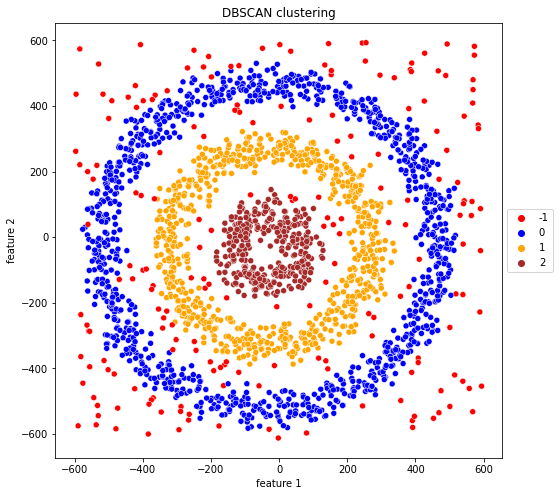

In [64]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df[0],y=df[1],hue=df['dbscan_labels'],palette=['red','blue','orange','brown'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('DBSCAN clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

DBSCAN amazingly clustered the data points into three clusters, and it also detected noise in the dataset represented by the red color.

In [43]:
df.head()

,0,1,kmeans_labels,hier_labels,dbscan_labels
0,484.891555,-31.006357,1,1,0
1,489.391178,21.973916,1,2,0
2,462.886575,-27.599889,1,1,0
3,517.218479,5.588090,1,1,0
4,455.669049,1.982181,1,2,0
